In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('seattleWeather_1948-2017.csv')
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [3]:
data.shape

(25551, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


## Handle the missing value

In [5]:
data[pd.isnull(data['PRCP'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [6]:
data[data['RAIN'].isna()]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [7]:
data.isna().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [8]:
percentage_missing = (data.isna().sum()/data.shape[0])*100
percentage_missing

DATE    0.000000
PRCP    0.011741
TMAX    0.000000
TMIN    0.000000
RAIN    0.011741
dtype: float64

In [9]:
## Droppping the na
# data.dropna(inplace=True)
# percentage_missing = (data.isna().sum()/data.shape[0])*100
# percentage_missing, data.shape

In [10]:
## using fill na
data['PRCP'] = data['PRCP'].fillna(data['PRCP'].mean())
data['RAIN'] = data['RAIN'].fillna(data['RAIN'].mode()[0])


/tmp/ipykernel_246561/2175026070.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['RAIN'] = data['RAIN'].fillna(data['RAIN'].mode()[0])


In [11]:
percentage_missing = (data.isna().sum()/data.shape[0])*100
percentage_missing

DATE    0.0
PRCP    0.0
TMAX    0.0
TMIN    0.0
RAIN    0.0
dtype: float64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25551 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25551 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 823.5+ KB


## Encoding the categorical columns

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(data['RAIN'])
data['RAIN'] = encoder.transform(data['RAIN'])
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,1
1,1948-01-02,0.59,45,36,1
2,1948-01-03,0.42,45,35,1
3,1948-01-04,0.31,45,34,1
4,1948-01-05,0.17,45,32,1


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25551 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25551 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 998.2+ KB


## Analyzing the Relation and Outliers

In [15]:
from warnings import filterwarnings
filterwarnings('ignore')

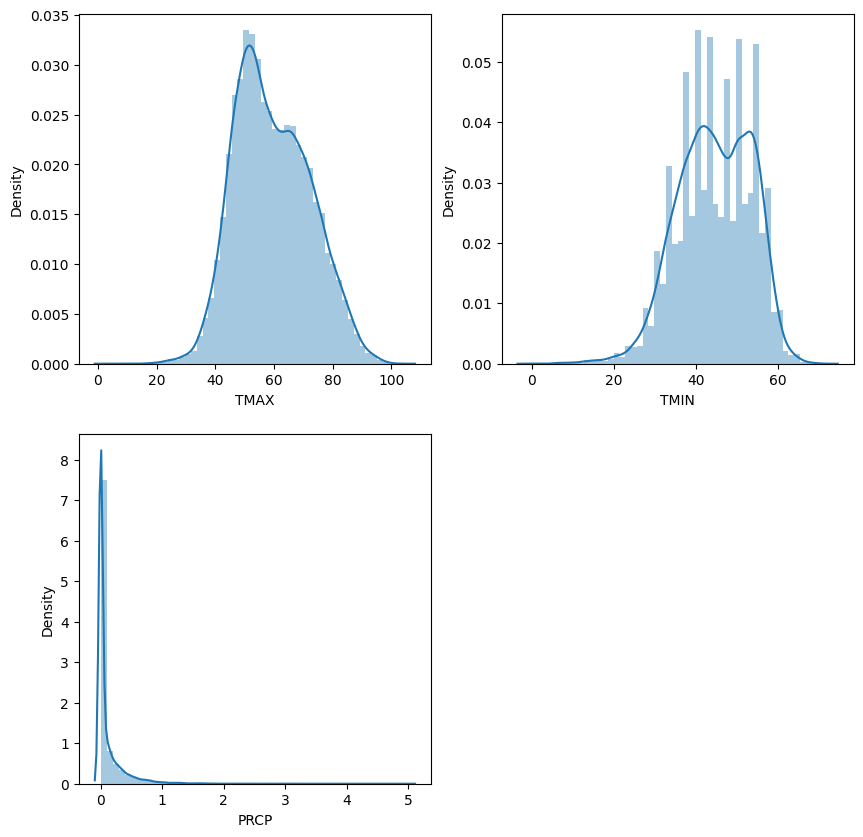

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(data['TMAX'])
plt.subplot(2,2,2)
sns.distplot(data['TMIN'])
plt.subplot(2,2,3)
sns.distplot(data['PRCP'])
plt.show()


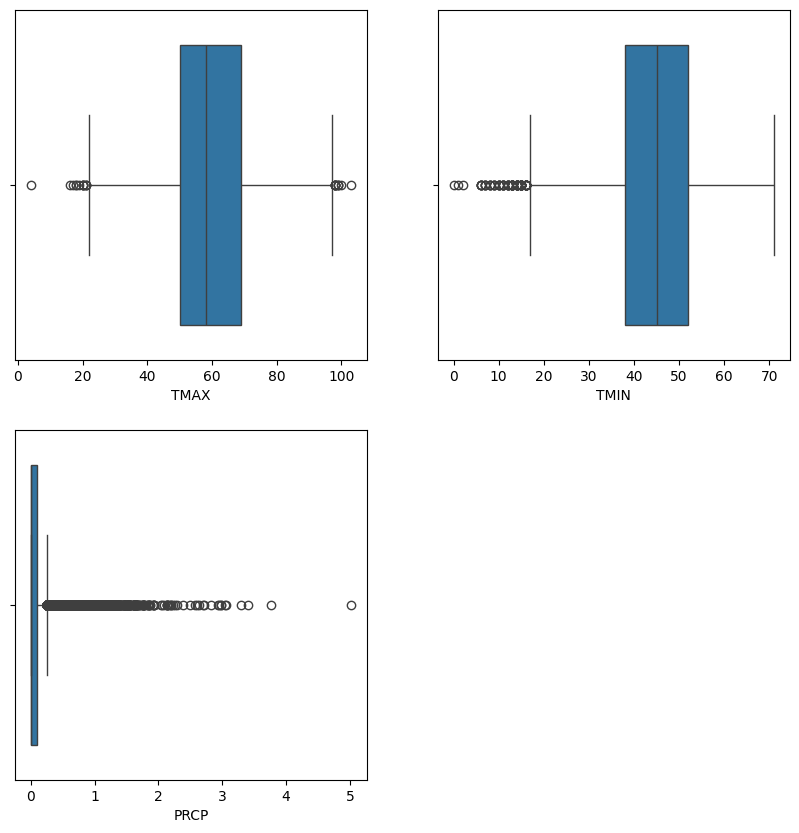

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(x=data['TMAX'])
plt.subplot(2,2,2)
sns.boxplot(x=data['TMIN'])
plt.subplot(2,2,3)
sns.boxplot(x=data['PRCP'])
plt.show()

In [18]:
data.describe()

,PRCP,TMAX,TMIN,RAIN
count,25551.000000,25551.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226,0.426598
std,0.239017,12.772984,8.892836,0.494592
min,0.000000,4.000000,0.000000,0.000000
25%,0.000000,50.000000,38.000000,0.000000
50%,0.000000,58.000000,45.000000,0.000000
75%,0.100000,69.000000,52.000000,1.000000
max,5.020000,103.000000,71.000000,1.000000


In [19]:
def outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + (1.5 * iqr)
    lower_bound = q1 - (1.5 * iqr)
    outliers_data = data[(data<lower_bound) |( data>upper_bound)]
    return outliers_data, upper_bound, lower_bound

In [20]:
tmax_out = outliers(data=data['TMAX'])
tmin_out = outliers(data=data['TMIN'])
prcp_out = outliers(data=data['PRCP'])

print(len(tmax_out[0]), len(tmin_out[0]), len(prcp_out[0]))


24 92 3558


In [21]:
tmax_out[1:], tmin_out[1:], prcp_out[1:] 

((97.5, 21.5), (73.0, 17.0), (0.25, -0.15000000000000002))

In [22]:
data.drop(data[data['TMIN'] < 17].index, inplace= True)
data.drop(data[(data['TMAX'] < 21) | (data['TMAX'] > 97)].index, inplace= True)
data.drop(data[(data['PRCP'] > 0.20)].index, inplace= True)

In [23]:
tmax_out = outliers(data=data['TMAX'])
tmin_out = outliers(data=data['TMIN'])
prcp_out = outliers(data=data['PRCP'])
print(len(tmax_out[0]), len(tmin_out[0]), len(prcp_out[0]))

0 0 3674


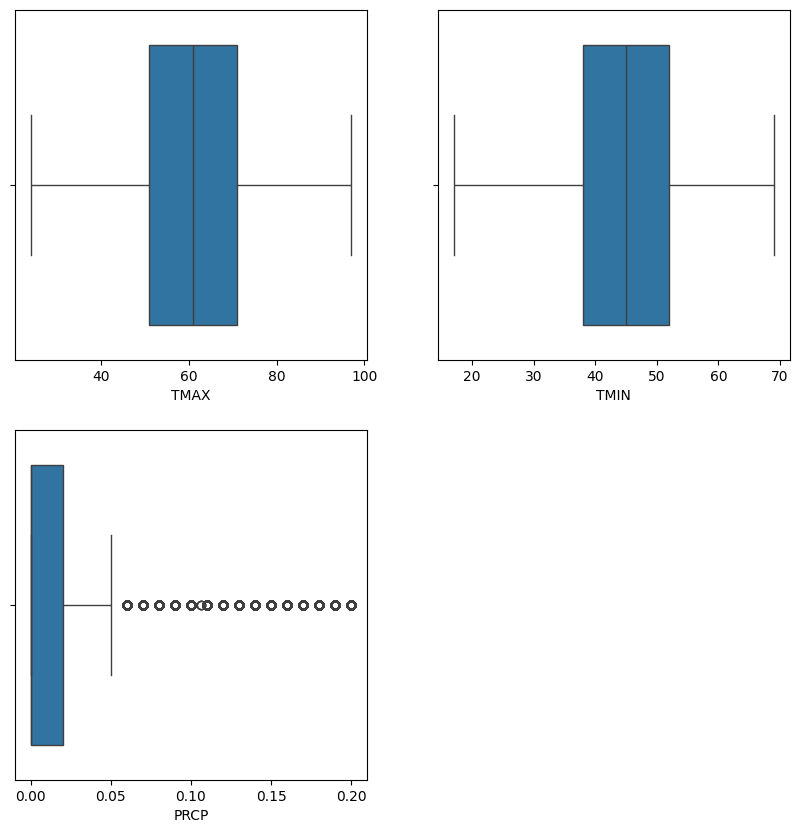

In [24]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(x=data['TMAX'])
plt.subplot(2,2,2)
sns.boxplot(x=data['TMIN'])
plt.subplot(2,2,3)
sns.boxplot(x=data['PRCP'])
plt.show()

## Training and Test Split

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21210 entries, 4 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    21210 non-null  object 
 1   PRCP    21210 non-null  float64
 2   TMAX    21210 non-null  int64  
 3   TMIN    21210 non-null  int64  
 4   RAIN    21210 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 994.2+ KB


In [27]:
X = data.drop(['RAIN', 'DATE'], axis= 1)
y = data['RAIN']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=52)

## Create, train and test

In [29]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [31]:
pred_df = X_test.copy()
preds = log_model.predict(X_test)
pred_df['Actual'] = y_test
pred_df['Preds'] = preds

In [32]:
pred_df

,PRCP,TMAX,TMIN,Actual,Preds
16239,0.00,71,53,0,0
11751,0.05,51,41,1,1
1629,0.00,70,50,0,0
23304,0.12,58,50,1,1
2305,0.00,57,34,0,0
...,...,...,...,...,...
11440,0.00,68,53,0,0
17148,0.00,37,30,0,0
17186,0.00,57,49,0,0
943,0.00,83,53,0,0


In [34]:
from sklearn.metrics import r2_score, accuracy_score
score = accuracy_score(pred_df['Actual'], pred_df['Preds'])
score

0.9123055162659123

In [35]:
log_model.classes_

array([0, 1])

In [38]:
data.drop(['DATE'], axis=1).corr()

,PRCP,TMAX,TMIN,RAIN
PRCP,1.000000,-0.281894,-0.112647,0.745966
TMAX,-0.281894,1.000000,0.869772,-0.338405
TMIN,-0.112647,0.869772,1.000000,-0.131327
RAIN,0.745966,-0.338405,-0.131327,1.000000


In [39]:
log_model.coef_

array([[40.1975971 , -0.15660466,  0.16304206]])

In [47]:
## PREDICTED probability
y_prob = log_model.predict_proba(X_test)
pred_df[['Prob_fail', 'Prob_success']] = y_prob
pred_df

## Success: Rain:1, Failure: No Rain:0

,PRCP,TMAX,TMIN,Actual,Preds,Prob_s,Prob_f,Prob_fail,Prob_success
16239,0.00,71,53,0,0,0.103247,0.896753,0.896753,0.103247
11751,0.05,51,41,1,1,0.735715,0.264285,0.264285,0.735715
1629,0.00,70,50,0,0,0.076268,0.923732,0.923732,0.076268
23304,0.12,58,50,1,1,0.985353,0.014647,0.014647,0.985353
2305,0.00,57,34,0,0,0.044490,0.955510,0.955510,0.044490
...,...,...,...,...,...,...,...,...,...
11440,0.00,68,53,0,0,0.155534,0.844466,0.844466,0.155534
17148,0.00,37,30,0,0,0.357309,0.642691,0.642691,0.357309
17186,0.00,57,49,0,0,0.349473,0.650527,0.650527,0.349473
943,0.00,83,53,0,0,0.017278,0.982722,0.982722,0.017278
